# Figure Processing


(203L, 284L)

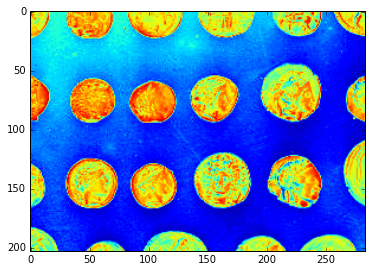

In [59]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

from skimage import data
from skimage.filters import threshold_otsu
from skimage.segmentation import clear_border
from skimage.measure import label
from skimage.morphology import closing, square
from skimage.measure import regionprops
from skimage.color import label2rgb


image = data.coins()[50:-50, 50:-50]
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(6, 6))
ax.imshow(image)

type(image)
image.shape

In [41]:
# apply threshold
thresh = threshold_otsu(image)
bw = closing(image > thresh, square(3))


In [42]:
# remove artifacts connected to image border
cleared = bw.copy()
clear_border(cleared)

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ..., 
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]], dtype=bool)

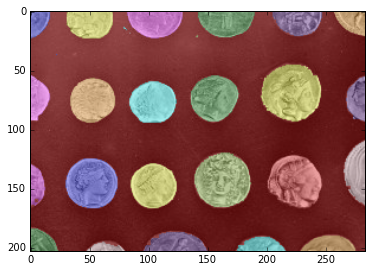

In [45]:
# label image regions
label_image = label(cleared)
image_label_overlay = label2rgb(label_image, image=image)# label image regions

fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(6, 6))
ax.imshow(image_label_overlay)

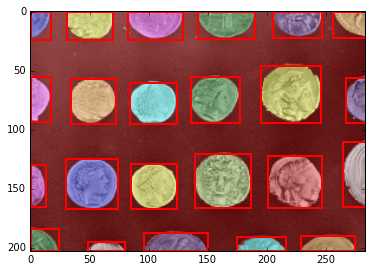

In [46]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(6, 6))
ax.imshow(image_label_overlay)
for region in regionprops(label_image):

    # skip small images
    if region.area < 100:
        continue

    # draw rectangle around segmented coins
    minr, minc, maxr, maxc = region.bbox
    rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                              fill=False, edgecolor='red', linewidth=2)
    ax.add_patch(rect)

plt.show()

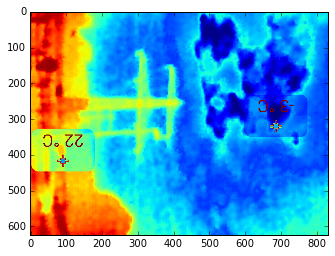

In [239]:
from skimage import io
from skimage import transform, color
img= io.imread('./img_thermal_1432794287455.jpg')
plt.imshow(img)
type(img)
img.shape



redimg = color.rgb2gray(img)

#redimg = img
#redimg = img[200:450, 0:800]
#redimg = transform.rescale(redimg, 0.05)
plt.imshow(redimg)


In [240]:
print redimg.shape



(624L, 832L)


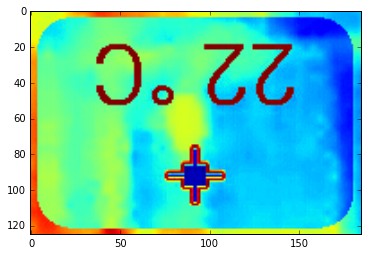

In [241]:
plt.imshow(bw)
plt.imshow(img)
temp = redimg[325:450, 0:185]
plt.imshow(temp)

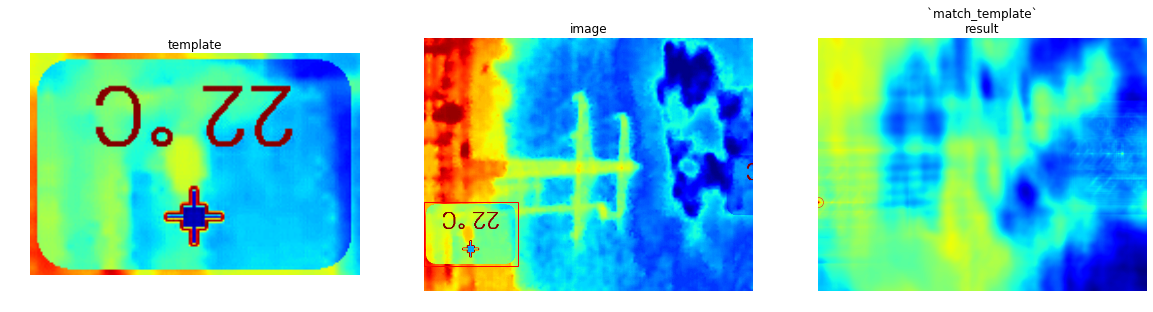

In [242]:
from skimage.feature import match_template

result = match_template(redimg, temp)


ij = np.unravel_index(np.argmax(result), result.shape)
x, y = ij[::-1]

fig = plt.figure(figsize=(20,20))
ax1 = plt.subplot(1, 3, 1)
ax2 = plt.subplot(1, 3, 2, adjustable='box-forced')
ax3 = plt.subplot(1, 3, 3, sharex=ax2, sharey=ax2, adjustable='box-forced')

ax1.imshow(temp)
ax1.set_axis_off()
ax1.set_title('template')

ax2.imshow(redimg)
ax2.set_axis_off()
ax2.set_title('image')
# highlight matched region
hcoin, wcoin = temp.shape
rect = plt.Rectangle((x, y), wcoin, hcoin, edgecolor='r', facecolor='none')
ax2.add_patch(rect)

ax3.imshow(result)
ax3.set_axis_off()
ax3.set_title('`match_template`\nresult')
# highlight matched region
ax3.autoscale(False)
ax3.plot(x, y, 'o', markeredgecolor='r', markerfacecolor='none', markersize=10)

plt.show()



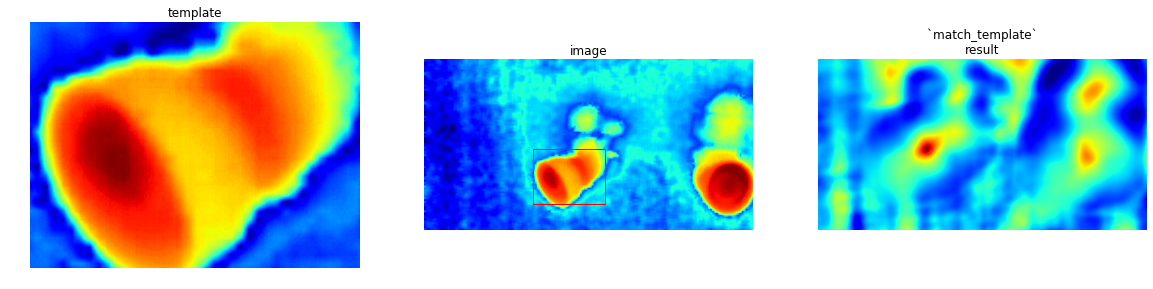

In [244]:
import numpy as np
import matplotlib.pyplot as plt

from skimage import data
from skimage.feature import match_template


#image = data.coins()
#coin = image[170:220, 75:130]
from skimage.color import rgb2gray
from skimage import io

img = io.imread("./Seek_Thermal/img_thermal_1463123877274.jpg")
image = rgb2gray(img)

#image = io.imread("/home/s36794/Documents/SeekThermal/img_thermal_1463123877274.jpg")
#coin = image[250:430, 300:500]
coin = image[250:400, 300:500]



result = match_template(image, coin)
ij = np.unravel_index(np.argmax(result), result.shape)
#x, y = ij[::-1]
y,x=ij

fig = plt.figure(figsize=(20, 20))
ax1 = plt.subplot(1, 3, 1)
ax2 = plt.subplot(1, 3, 2, adjustable='box-forced')
ax3 = plt.subplot(1, 3, 3, sharex=ax2, sharey=ax2, adjustable='box-forced')

ax1.imshow(coin)
ax1.set_axis_off()
ax1.set_title('template')

ax2.imshow(image)
ax2.set_axis_off()
ax2.set_title('image')
# highlight matched region
hcoin, wcoin = coin.shape
rect = plt.Rectangle((x, y), wcoin, hcoin, edgecolor='r', facecolor='none')
ax2.add_patch(rect)

ax3.imshow(result)
ax3.set_axis_off()
ax3.set_title('`match_template`\nresult')
# highlight matched region
ax3.autoscale(False)
ax3.plot(x, y, 'o', markeredgecolor='r', markerfacecolor='none', markersize=10)

plt.show()

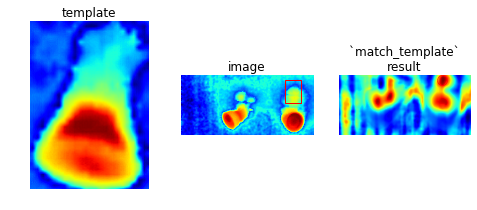

In [246]:
import numpy as np
import matplotlib.pyplot as plt

from skimage import data
from skimage.feature import match_template


#image = data.coins()
#coin = image[170:220, 75:130]
from skimage.color import rgb2gray
from skimage import io

img = io.imread("./Seek_Thermal/img_thermal_1463123877274.jpg")
image = rgb2gray(img)

#image = io.imread("/home/s36794/Documents/SeekThermal/img_thermal_1463123877274.jpg")
#coin = image[250:430, 300:500]
#coin = image[250:400, 300:500]

img2 = io.imread("./Seek_Thermal/img_thermal_1463123070735.jpg")
image2 = rgb2gray(img2)
coin=image2[450:620,280:400]


result = match_template(image, coin)
ij = np.unravel_index(np.argmax(result), result.shape)
#x, y = ij[::-1]
y,x=ij

fig = plt.figure(figsize=(8, 3))
ax1 = plt.subplot(1, 3, 1)
ax2 = plt.subplot(1, 3, 2, adjustable='box-forced')
ax3 = plt.subplot(1, 3, 3, sharex=ax2, sharey=ax2, adjustable='box-forced')

ax1.imshow(coin)
ax1.set_axis_off()
ax1.set_title('template')

ax2.imshow(image)
ax2.set_axis_off()
ax2.set_title('image')
# highlight matched region
hcoin, wcoin = coin.shape
rect = plt.Rectangle((x, y), wcoin, hcoin, edgecolor='r', facecolor='none')
ax2.add_patch(rect)

ax3.imshow(result)
ax3.set_axis_off()
ax3.set_title('`match_template`\nresult')
# highlight matched region
ax3.autoscale(False)
ax3.plot(x, y, 'o', markeredgecolor='r', markerfacecolor='none', markersize=10)

plt.show()

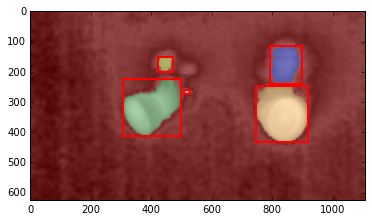

In [248]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

from skimage import data
from skimage.filter import threshold_otsu
from skimage.segmentation import clear_border
from skimage.morphology import label, closing, square
from skimage.measure import regionprops
from skimage.color import label2rgb

from skimage import io
img = io.imread("./Seek_Thermal/img_thermal_1463123877274.jpg")
from skimage.color import rgb2gray
image = rgb2gray(img)
#image = data.coins()[50:-50, 50:-50]

# apply threshold
thresh = threshold_otsu(image)
bw = closing(image > thresh, square(3))

# remove artifacts connected to image border
cleared = bw.copy()
clear_border(cleared)

# label image regions
label_image = label(cleared)
borders = np.logical_xor(bw, cleared)
label_image[borders] = -1
image_label_overlay = label2rgb(label_image, image=image)

fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(6, 6))
ax.imshow(image_label_overlay)

for region in regionprops(label_image):

    # skip small images
    if region.area < 100:
        continue

    # draw rectangle around segmented coins
    minr, minc, maxr, maxc = region.bbox
    rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                              fill=False, edgecolor='red', linewidth=2)
    ax.add_patch(rect)

plt.show()